# Supervised Learning Foundation (Regression)

+ 6- linear regression
    - main site: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    - implementation: https://www.educative.io/blog/scikit-learn-tutorial-linear-regression

!["6.1-linear_regression"](6.1-linear_regression.png)

#---------------------------- Parameters ------------------------------------#
+ fit_intercept :bool, default=True..
    - Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
    - if `true` use value c.
    - if `false` let `value c = 0` and use `slope` only

+ copy_X :bool, default=True
    - If True, X will be copied; else, it may be overwritten.

+ n_jobs :int, default=None
    - The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

+ positive :bool, default=False
    - When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

#---------------------------- Attributes ------------------------------------#
+ `coef_` array of shape (n_features, ) or (n_targets, n_features) `slope`
    - Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

+ rank_int
    - Rank of matrix X. Only available when X is dense.

+ singular_array of shape (min(X, y),)
    - Singular values of X. Only available when X is dense.

+ `intercept_` float or array of shape (n_targets,) `value c`
    - Independent term in the linear model. Set to 0.0 if fit_intercept = False.

+ n_features_in_ :int
    - Number of features seen during fit.

+ feature_names_in_ :ndarray of shape (n_features_in_,)
    - Names of features seen during fit. Defined only when X has feature names that are all strings.

#---------------------------- Methods ------------------------------------#
+ `fit`(X, y[, sample_weight])
    - Fit linear model.

+ get_metadata_routing()
    - Get metadata routing of this object.

+ get_params([deep])
    - Get parameters for this estimator.

+ `predict`(X)
    - Predict using the linear model.

+ score(X, y[, sample_weight])
    - Return the coefficient of determination of the prediction.

+ set_fit_request(*[, sample_weight])
    - Request metadata passed to the fit method.

+ set_params(**params)
    - Set the parameters of this estimator.

+ set_score_request(*[, sample_weight])
    - Request metadata passed to the score method.

!["6.2_test"](6.2_test.png)

+ coef_ is `slope`
+ intercept_ is `value c`

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df= pd.read_csv(r"train.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [70]:
df.isna().sum()

x    0
y    1
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df['x'].shape

(699,)

+ use .values.reshape(-1,1)
    - Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
    - or array.reshape(1, -1) if it contains a single sample.


In [73]:
x= df['x'].values.reshape(-1, 1)
y= df['y']

In [74]:
df['x']

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
695    58.0
696    93.0
697    82.0
698    66.0
699    97.0
Name: x, Length: 699, dtype: float64

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr= LinearRegression().fit(x,y)

slope

In [77]:
lr.coef_

array([1.00065638])

value c or y-intercept

In [78]:
lr.intercept_

-0.10726546430095141

In [79]:
pred= lr.predict(x)

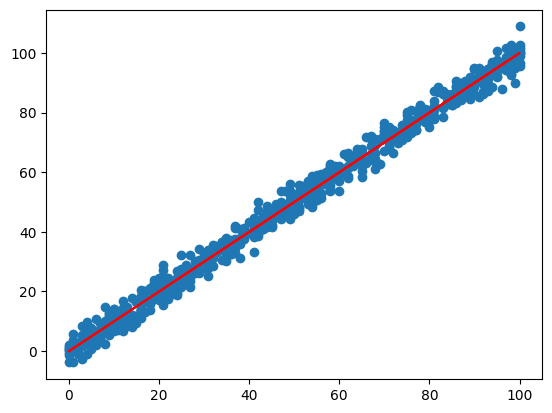

In [80]:
plt.scatter(x, y)
plt.plot(x, pred, color= 'red')

7. Loss function and accuracy metrics

!["7.1-loss_function"](7.1-loss_function.png)

+ measures error:
+ `mean absolute error` (MAF): (sum(abs(y_actual - predict))) / n
+ mean absolute error make `sharp edge` which `not good in gradient`.
+ `mean square erro`r (MAF): (sum(square(y_actual - predict))) / n
+ mean square error make `curve edge` which `good in gradient`.
+ mean square error= `50` and y_actual= `500` then predict value between `550 or 450`
+ Resegual sum squares (`RSS`): sum(square(y_actual - predict))

+ problem that these measures are `not good` to calculate error for `one model`.

!["7.2-accuracy_metrics"](7.2-accuracy_metrics.png)

+ accuracy metrics: R**2 score
+ `RSS_model`= sum(square(y - predict))
+ `RSS_average`= sum(square(y - mean(y)))
+ `R**2 score`= RSS_model / RSS_average
+ R**2 score return `error ratio` then `accuracy ratio`= 1 - error ratio

!["7.3-test"](7.3-test.png)

mean square error= `54` and if y_actual= `100` then predict value between `154 or 46`

8. machine learning

!["8-supervised_unsupervised_reniforsement_learning"](8-supervised_unsupervised_reniforsement_learning.png)

+ classification is `discrete` 0, 1, 2, ...
+ Regression is `continuous` 0.2, 5.6, 7.3, ...

9. Polynomial features
- make curve for model for try fit more points
- site: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

!["9.1-std_min_max_scaler"](9.1-std_min_max_scaler.png)

#----------------------------Parameters------------------------------------#
+ `degree`: int or tuple (min_degree, max_degree), default=2
    - If a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features. Note that min_degree=0 and min_degree=1 are equivalent as outputting the degree zero term is determined by include_bias.

+ interaction_onlybool, default=False
    - If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:

    - included: x[0], x[1], x[0] * x[1], etc.

    - excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

+ include_biasbool, default=True
    - If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

+ order{‘C’, ‘F’}, default=’C’
    - Order of output array in the dense case. 'F' order is faster to compute, but may slow down subsequent estimators.

#----------------------------Attributes------------------------------------#
+ powers_ndarray of shape (n_output_features_, n_features_in_)
    - Exponent for each of the inputs in the output.

+ n_features_in_int
    - Number of features seen during fit.

+ feature_names_in_ndarray of shape (n_features_in_,)
    - Names of features seen during fit. Defined only when X has feature names that are all strings.

+ n_output_features_int
    - The total number of polynomial output features. The number of output features is computed by iterating over all suitably sized combinations of input features.


#----------------------------Methods------------------------------------#
+ `fit`(X[, y])
    - Compute `number of output features`.

+ `fit_transform`(X[, y])
    - `Fit` to data, then `transform` it.

+ get_feature_names_out([input_features])
    - Get output feature names for transformation.

+ get_metadata_routing()
    - Get metadata routing of this object.

+ get_params([deep])
    - Get parameters for this estimator.

+ set_output(*[, transform])
    - Set output container.

+ set_params(**params)
    - Set the parameters of this estimator.

+ `transform`(X)
    - `Transform data` to polynomial features.

!["9.2-poly_std_scaler"](9.2-poly_std_scaler.png)

In [81]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [82]:
# for d in range(20):
#     ply= PolynomialFeatures()
    

10. overfitting

!["10-bias_variance"](10-bias_variance.png)

- `less` features make `underfitting`
- `more` features make `overfitting`
- `important` features make `goodfitting`
- overfittng is `high variance` and `low bias`
- underfittng is `low variance` and `high bias`

11 - Regularization
- Ridge: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

!["11-ridge_lasso"](11-ridge_lasso.png)

12 - Gradient 

!["12.1-gradient"](12.1-gradient.png)

!["12.2-gradient"](12.2-gradient.png)

sgd without scale

!["13.1-sgd_without_Scale"](13.1-sgd_without_Scale.png)

sgd with scale

!["13.2-sgd_with_Scale"](13.2-sgd_with_Scale.png)

sgd with scal and polynomial features

!["13.3-poly_scl_sgd"](13.3-poly_scl_sgd.png)

best max_iter parameter for SGDRegressor = 50 

In [83]:
from sklearn.linear_model import SGDRegressor

14 - Data Preprocessing

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df= pd.read_csv(r"insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


!["14.1-simpleimputer"](14.1-simpleimputer.png)

In [86]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we have `categorical features` so we should convert them to `numerical features` using `Encoding`

+ categorical features are two categories: `ordinal` and `nominal`
    - ordinal features such as degress A B C D F so we convert them to 4 3 2 1 0  -> `label encoder`.
    - `label encoder` that `convert` values in `same column` to 4 3 2 1 0
    - nominal features such as gender or color green, blue and red -> `one hot encoding`.
    - `one hot encoding` that `generate new column` for green, new column for blue and new column for red.
    - but we should remove column from colors which are predicted 100%.

In [87]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [88]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

we convert `sex` and `smoker` using `label encoding`

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le= LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [91]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

we convert `region` using `one hot encoding` with method `get_dummies`

In [92]:
df= pd.get_dummies(df, columns=['region'], drop_first=True)
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [93]:
df= df.astype(int)
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


convert all categorical features in one step using `label encoder`

In [94]:
# cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# for col in cat_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

# df.head()

+ Scaling : less scale numerical features

make scaling using `MinMaxScale`

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
x= df.drop('charges', axis=1)
y= df['charges']
mxs= MinMaxScaler()
x_Scl= mxs.fit_transform(x)
x_Scl

array([[0.02173913, 0.        , 0.31578947, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.47368421, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 1.        , 0.47368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.55263158, ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.        , 0.26315789, ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.36842105, ..., 1.        , 0.        ,
        0.        ]])

In [97]:
x_Scl.shape

(1338, 8)

15 - Multilinear regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [99]:
lr= LinearRegression()

model= lr.fit(x_Scl, y)
pred= lr.predict(x_Scl)
acc= r2_score(y, pred)
acc

0.7508828216439194

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly= PolynomialFeatures(degree=3)
x_poly= poly.fit_transform(x_Scl)

mxs= MinMaxScaler()
x_scl_poly= mxs.fit_transform(x_poly)

model_poly= lr.fit(x_scl_poly, y)
pred= lr.predict(x_scl_poly)
acc= r2_score(y, pred)
acc

0.8432719694192019

so polynomial Features `increase Accuracy`

16 - Model evaluation and splitting the data

In [102]:
x

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,0,0,1
1,18,1,33,1,0,0,1,0
2,28,1,33,3,0,0,1,0
3,33,1,22,0,0,1,0,0
4,32,1,28,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,1,0,0
1334,18,0,31,0,0,0,0,0
1335,18,0,36,0,0,0,1,0
1336,21,0,25,0,0,0,0,1


In [103]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1338, dtype: int32

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [106]:
lr= LinearRegression()
lr.fit(x_train, y_train)

train_preds= lr.predict(x_train)
test_preds= lr.predict(x_test)

acc_train= r2_score(y_train, train_preds)
acc_test= r2_score(y_test, test_preds)

print(f"Acc Train= {acc_train} Acc Test= {acc_test}")

Acc Train= 0.7459596898367392 Acc Test= 0.7667556263990584


In [107]:
x_train, x_test, y_train, y_test= train_test_split(x_scl_poly, y, test_size=0.2)

In [108]:
lr= LinearRegression()
lr.fit(x_train, y_train)
train_preds= lr.predict(x_train)
test_preds= lr.predict(x_test)
acc_train= r2_score(y_train, train_preds)
acc_test= r2_score(y_test, test_preds)
print(f"Acc Train= {acc_train} Acc Test= {acc_test}")

Acc Train= 0.8537474040696267 Acc Test= 0.8602873086538486


21- DecsionTreeRegressor

the model select nodes if 4 positive and 2 negative model make `majority decision` or if 5 values in regression make `average values `

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [110]:
lr= DecisionTreeRegressor()
lr.fit(x_train, y_train)

train_preds= lr.predict(x_train)
test_preds= lr.predict(x_test)

acc_train= r2_score(y_train, train_preds)
acc_test= r2_score(y_test, test_preds)

print(f"Acc Train= {acc_train} Acc Test= {acc_test}")

Acc Train= 0.9974876059786615 Acc Test= 0.7398298543733715


In [111]:
print(f"max_depth = {lr.get_depth()}")

max_depth = 21


# SVR

+ support vector regression (`SVR`)
    - his mergan ignores `outliers`

!["19.2-SVR"](19.2-SVR.png)

In [114]:
from sklearn.svm import SVR

In [115]:
clf= SVR(kernel='rbf', degree=20)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test: {acc_test}")

Acc train -0.09739078179692151, Acc test: -0.09567708126434371


# KNeighborsRegressor

!["20.2-KNN"](20.2-KNN.png)

wehn `n_neighbors= 3` thw model select the` closest 3 points` then get average of points 

In [116]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
clf = KNeighborsRegressor(n_neighbors=7)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

Acc train 0.8185203366004219, Acc test 0.772355821531618


# DecsionTreeRegressor

the model select nodes if 4 positive and 2 negative model make `majority decision` or if 5 values in regression make `average values `

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
clf = DecisionTreeRegressor(max_depth=7)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

Acc train 0.9083147065471646, Acc test 0.8124083091872124


# Ensemble models

!["Ensemble models"](22-Ensemble_models.png)

- majority for classification
- mean or median for regression

# Random forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- n_estimatorsint, default=100
    - The number of trees in the forest.
- max_depth

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

Acc train 0.964514352994582, Acc test 0.8387673499798937


In [125]:
clf = RandomForestRegressor(n_estimators=10, max_depth=7)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

Acc train 0.9111075736054869, Acc test 0.8663734517570117


# 24 - Boosting and XGboost
- make `learning on errors` belongs last model in ensembles.

In [132]:
from xgboost import XGBRegressor

In [133]:
clf = XGBRegressor()
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Acc train 0.9954148122986043, Acc test 0.8492527129262877


+ eta : decrease learning rate , default= 0.3
    - when `increase` learning rate model arrives to target `faster` but make `overfitting`

In [134]:
clf = XGBRegressor(eta=0.5)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Acc train 0.9973065166614637, Acc test 0.8423776138782697


+ gamma : increase levels trees , default= 0
    - `increase` levels trees make `less in questions` then `sharpe linear` with one question

In [135]:
clf = XGBRegressor(gamma=10)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Acc train 0.9954148065368055, Acc test 0.849251298975275


+ max_depth : 

In [136]:
clf = XGBRegressor(max_depth=10)
clf.fit(x_train, y_train)

preds_train = clf.predict(x_train)
preds_test = clf.predict(x_test)

acc_train = r2_score(y_train, preds_train)
acc_test = r2_score(y_test, preds_test)

print(f"Acc train {acc_train}, Acc test {acc_test}")

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Acc train 0.9974856277074449, Acc test 0.8378692003704851
